<a href="https://colab.research.google.com/github/ccemozclk/NLP---Sentiment-Analysis-for-Restaurant-Customers/blob/main/NLP_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Restaurant Customers Comment -->

## Import Libraries --->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob

from wordcloud import WordCloud
from warnings import filterwarnings

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Import Dataset --->

In [3]:
def load_dataset():
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Examples/NLP-Restaurant Reviews/Restaurant_Reviews.csv", delimiter="\t")
  return data

df = load_dataset()

In [4]:
restaurant_df = df.copy()

## Descriptive Statistics Of Data -->

In [5]:
restaurant_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
restaurant_df.shape

(1000, 2)

## Data Manipulation --->

### Normalizing ->

In [8]:
restaurant_df['Review'] = restaurant_df['Review'].str.lower()

In [9]:
restaurant_df.head

<bound method NDFrame.head of                                                 Review  Liked
0                             wow... loved this place.      1
1                                   crust is not good.      0
2            not tasty and the texture was just nasty.      0
3    stopped by during the late may bank holiday of...      1
4    the selection on the menu was great and so wer...      1
..                                                 ...    ...
995  i think food should have flavor and texture an...      0
996                           appetite instantly gone.      0
997  overall i was not impressed and would not go b...      0
998  the whole experience was underwhelming, and i ...      0
999  then, as if i hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

### Clean the Punctuations -->

In [10]:
restaurant_df['Review'] = restaurant_df['Review'].str.replace('[^\w\s]', '')

In [11]:
restaurant_df['Review'] = restaurant_df['Review'].str.replace('\d', '')

### Stopwords --->

We've to get rid of commonly used words

In [12]:
stop_words = stopwords.words('english')
restaurant_df['Review'] = restaurant_df['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in stop_words))

### Rarewords --->

In [13]:
dropping = pd.Series(' '.join(restaurant_df['Review']).split()).value_counts()[-250:]
restaurant_df['Review'] = restaurant_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in dropping))

### Tokenization --->

Seperating sentences of sentence's parts

In [14]:
restaurant_df["Review"].apply(lambda x: TextBlob(x).words).head()

0                                  [wow, loved, place]
1                                        [crust, good]
2                              [tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, recommenda...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

### Stemming --->


And the now, we seperate the words by root

In [15]:
restaurant_df['Review'] = restaurant_df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [16]:
restaurant_df['Review'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday recommendation l...
4                           selection menu great price
Name: Review, dtype: object

### Visualization --->

In [17]:
rest_tf = restaurant_df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [18]:
rest_tf.columns = ["words", "tf"]
rest_tf.head()

,words,tf
0,place,111.00
1,wow,3.00
2,loved,10.00
3,good,95.00
4,crust,2.00


In [19]:
rest_tf.shape

(1588, 2)

In [20]:
rest_tf["words"].nunique()

1588

In [21]:
rest_tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   1588.00
mean       3.38
std        7.18
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        3.00
80%        4.00
90%        7.00
95%       12.00
99%       26.13
max      125.00
Name: tf, dtype: float64

In [22]:
rest_tf.sort_values("tf", ascending = False)

,words,tf
71,food,125.00
0,place,111.00
3,good,95.00
37,service,84.00
17,great,70.00
...,...,...
288,appalling,1.00
987,companion,1.00
988,poop,1.00
989,ground,1.00


### Chart Visualization --->

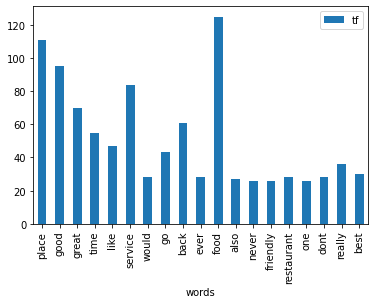

In [23]:
rest_tf[rest_tf["tf"] > 25].plot.bar(x="words", y="tf")
plt.show()

### WordCloud --->

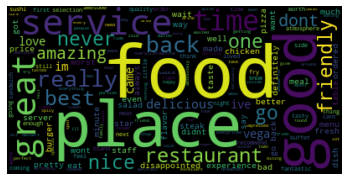

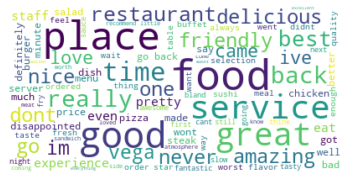

In [24]:
text = " ".join(i for i in restaurant_df.Review)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

## Sentiment Analysis --->

In [25]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was awesome")

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [26]:
restaurant_df["Review"].apply(lambda x: x.upper())

0                                        WOW LOVED PLACE
1                                             CRUST GOOD
2                                    TASTY TEXTURE NASTY
3      STOPPED LATE MAY BANK HOLIDAY RECOMMENDATION L...
4                             SELECTION MENU GREAT PRICE
                             ...                        
995                    THINK FOOD FLAVOR TEXTURE LACKING
996                                       INSTANTLY GONE
997                      OVERALL IMPRESSED WOULD GO BACK
998    WHOLE EXPERIENCE UNDERWHELMING THINK WELL GO N...
999    HADNT WASTED ENOUGH LIFE POURED SALT WOUND DRA...
Name: Review, Length: 1000, dtype: object

In [27]:
restaurant_df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2    {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
3    {'neg': 0.152, 'neu': 0.32, 'pos': 0.528, 'com...
4    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
5    {'neg': 0.45, 'neu': 0.333, 'pos': 0.217, 'com...
6    {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'comp...
7    {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'comp...
8    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: Review, dtype: object

In [28]:
restaurant_df["polarity_score"] = restaurant_df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [29]:
restaurant_df.head()

,Review,Liked,polarity_score
0,wow loved place,1,0.83
1,crust good,0,0.44
2,tasty texture nasty,0,-0.56
3,stopped late may bank holiday recommendation l...,1,0.69
4,selection menu great price,1,0.62


## Sentiment Modeling --->

In [30]:
restaurant_df["Review"][0:10].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else "negative")

0    positive
1    positive
2    negative
3    positive
4    positive
5    negative
6    negative
7    positive
8    positive
9    positive
Name: Review, dtype: object

Apply for all data values

In [31]:
restaurant_df["sentiment_label"] = restaurant_df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
restaurant_df.head(20)

,Review,Liked,polarity_score,sentiment_label
0,wow loved place,1,0.83,pos
1,crust good,0,0.44,pos
2,tasty texture nasty,0,-0.56,neg
3,stopped late may bank holiday recommendation l...,1,0.69,pos
4,selection menu great price,1,0.62,pos
5,getting want damn pho,0,-0.34,neg
6,honeslty didnt taste fresh,0,-0.24,neg
7,potato like could tell made ahead time kept wa...,0,0.57,pos
8,fry great,1,0.62,pos
9,great touch,1,0.62,pos


In [32]:
restaurant_df.groupby("sentiment_label")["Liked"].mean()

sentiment_label
neg   0.21
pos   0.75
Name: Liked, dtype: float64

In [33]:
restaurant_df["sentiment_label"] = LabelEncoder().fit_transform(restaurant_df["sentiment_label"])

In [34]:
X = restaurant_df["Review"]
y = restaurant_df["sentiment_label"]

### Count Vector --->

Now, we converts text to a term count vector
 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features= 1000)
x_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names()[10:15]
x_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF --->

After from the Count Vector at now, we calculated TF-IDF . It's the weight factor calculated with the statistical method that shows the importance of a term in the document

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [37]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)

## Machine Learning Algorithms -->

### 1. Logistic Regression -->

In [38]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model, X_tf_idf_word, y, scoring = "accuracy", cv = 5).mean()

0.8219999999999998

In [47]:
random_review = pd.Series(restaurant_df["Review"].sample(1).values)
random_review

0    pretty good beer selection
dtype: object

In [48]:
new_comment = CountVectorizer().fit(X).transform(random_review)
log_model.predict(new_comment)

array([1])

### 2. Random Forest -->

In [49]:
rf_model = RandomForestClassifier().fit(x_count, y)
print(cross_val_score(rf_model, x_count, y, cv = 5, n_jobs = -1 ).mean())

0.829


#### TF-IDF Word-Level -->

In [50]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
print(cross_val_score(rf_model, X_tf_idf_word, y, cv = 5, n_jobs = -1).mean())

0.8140000000000001


In [52]:
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
print(cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean())

0.807


#### Hyperparameter Optimization --->

In [53]:
rf_model = RandomForestClassifier(random_state = 17)

rf_params = {"max_depth": [5,8, None],
             "max_features": [5,7,"auto"],
             "min_samples_split": [2,5,8,20],
             "n_estimators": [100,200,500]}


rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv = 5,
                            n_jobs = -1, 
                            verbose = True).fit(x_count, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state = 17).fit(x_count, y)

cv_results = cross_validate(rf_final, x_count, y, cv = 3, scoring = ["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


0.8989518421780992

## Algorithm Test -->

In [58]:
alg_visual = [["Random Forest", 0.90], ["Logistic Regression", 0.82]]

In [59]:
label_names = ["Algorithm", "Accuracy"]

In [60]:
graph = pd.DataFrame(data= alg_visual, columns= label_names)
print(graph)

             Algorithm  Accuracy
0        Random Forest      0.90
1  Logistic Regression      0.82


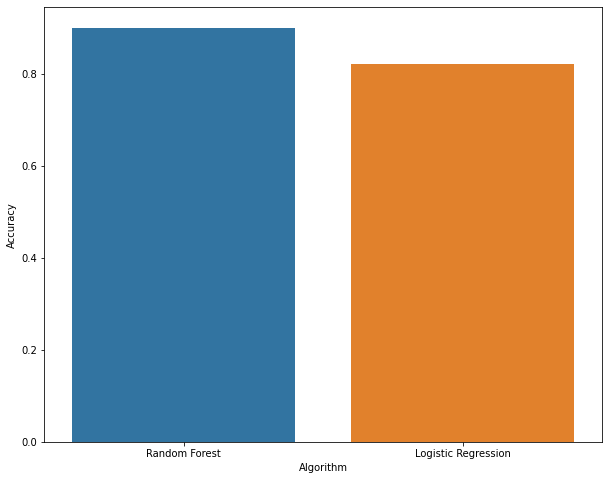

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.barplot( x = "Algorithm", y = graph.Accuracy, data = graph);

In [63]:
comment_ = 'this place look like wonderland'
comment_list = []
comment_list.append(comment_)

In [64]:
comment_transforming = vectorizer.transform(comment_list)

In [65]:
comment_toarray = comment_transforming.toarray()

In [66]:
rf_model.predict(comment_toarray)

array([1])